# Proyecto C&P

Desarrollar una automatización que permita extraer e interpretar la data del archivo Student-mat.csv y Student-por.csv de manera que una la información solicitada de ambos archivos y realice los requerimientos solicitados

# importar los datos  a python

In [2]:
# normalmente los archivos .csv vienen separados por , en este caso especial estan separados por ;

import pandas as pd

data_mat=pd.read_csv("student-mat.csv",sep=";") #data original como df
data_por=pd.read_csv("student-por.csv",sep=";")

data_mat


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


# 1) 
Para ambos archivos:
Cree un DataFrame para cada escuela, con el formato de nombre “nombrecolegio_curso” que reúna los datos de las columnas:  school, sex, age, address, Pstatus, guardian, traveltime, studytime, failures, paid, internet, health, absences, G1,G2,G3


In [3]:
from IPython.core.display import HTML

#display(HTML(df.to_html())) # esto reemplaza nuestro print para ver los df bonitos

# Primero filtro los datos  y tomo SOLO las columnas que me pidieron
# creo un df para mat y otro para por


# Filtro por columnas

df_mat=data_mat[["school", "sex", "age", "address", "Pstatus", "guardian", "traveltime",
                 "studytime", "failures", "paid", "internet", "health", "absences", "G1","G2","G3"]]
                #filtro para sacar las columnas requeridas
df_por=data_por[["school", "sex", "age", "address", "Pstatus", "guardian", "traveltime",
                 "studytime", "failures", "paid", "internet", "health", "absences", "G1","G2","G3"]]   
 
#display(HTML(df_por.to_html()))

# ahora filtro por filas para separar por colegios

df_mat_sep=df_mat.groupby(["school"]) # groupby busca  cosas repetidas  en la columna  y las agrupa
df_por_sep=df_por.groupby(["school"])

for key,group in df_mat_sep:
    
    if key=="GP":
        #print(f"la key es: {key} y el grupo es : \n{group}")
        gp_mat=group 
    
    elif key=="MS":
        #print(f"la key es: {key} y el grupo es : \n{group}") 
        ms_mat=group

for key,group in df_por_sep:
    
    if key=="GP":
        #print(f"la key es: {key} y el grupo es : \n{group}")
        gp_por=group 
    
    elif key=="MS":
        #print(f"la key es: {key} y el grupo es : \n{group}") 
        ms_por=group

        
# recorderis

# ahora tenemos lo que me pidieron

# cada colegio y curso separados

# gp_mat
# gp_por
# ms_mat
# ms_por

# cada materia ambos colegios

# df_mat
# df_por

display(HTML(gp_mat.to_html()))
display(HTML(ms_por.to_html()))


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3
0,GP,F,18,U,A,mother,2,2,0,no,no,3,6,5,6,6
1,GP,F,17,U,T,father,1,2,0,no,yes,3,4,5,5,6
2,GP,F,15,U,T,mother,1,2,3,yes,yes,3,10,7,8,10
3,GP,F,15,U,T,mother,1,3,0,yes,yes,5,2,15,14,15
4,GP,F,16,U,T,father,1,2,0,yes,no,5,4,6,10,10
5,GP,M,16,U,T,mother,1,2,0,yes,yes,5,10,15,15,15
6,GP,M,16,U,T,mother,1,2,0,no,yes,3,0,12,12,11
7,GP,F,17,U,A,mother,2,2,0,no,no,1,6,6,5,6
8,GP,M,15,U,A,mother,1,2,0,yes,yes,1,0,16,18,19
9,GP,M,15,U,T,mother,1,2,0,yes,yes,5,0,14,15,15


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3
423,MS,F,16,U,T,father,2,1,0,no,yes,5,11,10,11,11
424,MS,F,16,R,T,mother,2,2,0,no,yes,5,0,12,12,12
425,MS,F,15,R,T,mother,1,1,1,no,no,2,6,10,10,10
426,MS,F,15,R,T,mother,2,1,0,no,yes,5,4,10,10,11
427,MS,F,16,R,T,mother,2,2,0,no,no,5,0,16,17,17
428,MS,F,15,R,T,mother,2,1,0,no,no,1,0,6,8,9
429,MS,M,16,R,A,mother,1,2,0,no,no,2,5,10,11,11
430,MS,M,16,U,A,mother,1,3,0,no,yes,5,0,10,11,11
431,MS,F,17,R,T,father,1,2,1,no,no,5,0,10,10,10
432,MS,F,17,R,T,father,1,1,1,no,yes,5,0,6,6,7


# 2
Verifique que no haya data de valor nulo (NaN), en caso de encontrar algún valor NaN se deberá eliminar toda la fila 

In [4]:
# recomendado del profe, revisen el ejemplo que esta en "semana_10_miercoles"

gp_mat=gp_mat.dropna(how="any",axis=0)#dropna elimina valores nulos, axis 0 indica filas
gp_por=gp_por.dropna(how="any",axis=0)
ms_mat=ms_mat.dropna(how="any",axis=0)
ms_por=ms_por.dropna(how="any",axis=0)

df_mat=df_mat.dropna(how="any",axis=0)
df_por=df_por.dropna(how="any",axis=0)

# 3 
Para cada escuela muestre un grafico circular(pastel) donde se evidencie el porcentaje de estudiantes hombres y mujeres de cada curso

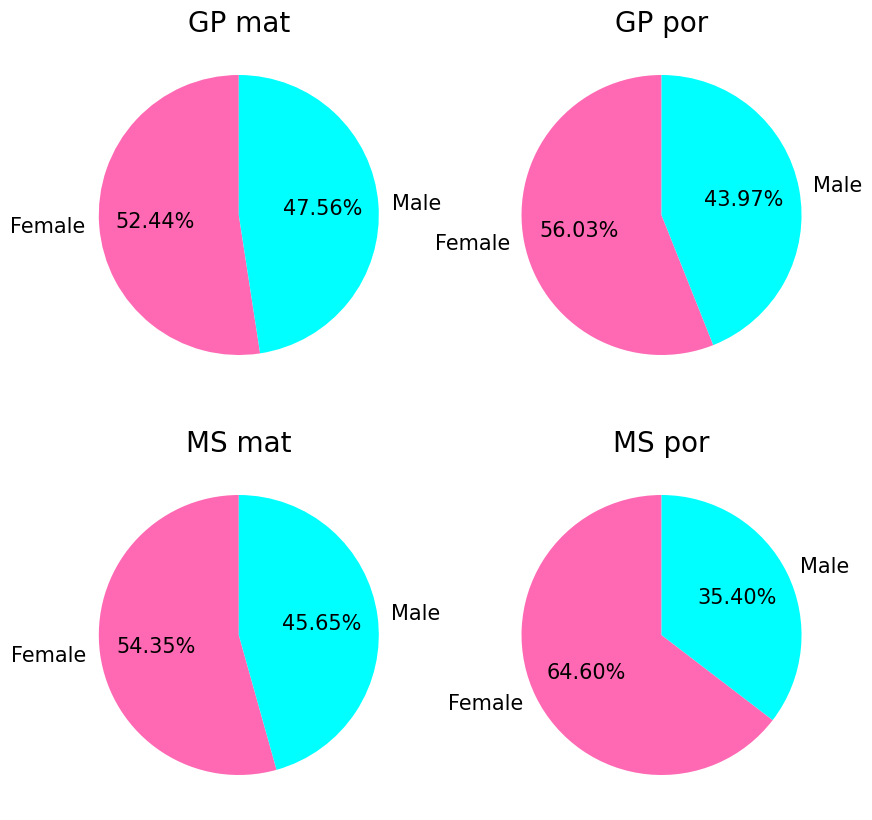

In [77]:
#print(gp_mat["sex"].value_counts()) #separa y cuenta las cosas repetidas

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)

ax1.pie(gp_mat["sex"].value_counts(),labels=["Female","Male"],autopct="%.2f%%",colors=["hotpink","aqua"],startangle=90,textprops={"fontsize":15})
ax2.pie(gp_por["sex"].value_counts(),labels=["Female","Male"],autopct="%.2f%%",colors=["hotpink","aqua"],startangle=90,textprops={"fontsize":15})
ax3.pie(ms_mat["sex"].value_counts(),labels=["Female","Male"],autopct="%.2f%%",colors=["hotpink","aqua"],startangle=90,textprops={"fontsize":15})
ax4.pie(ms_por["sex"].value_counts(),labels=["Female","Male"],autopct="%.2f%%",colors=["hotpink","aqua"],startangle=90,textprops={"fontsize":15})

ax1.set_title("GP mat",fontsize=20)
ax2.set_title("GP por",fontsize=20)
ax3.set_title("MS mat",fontsize=20)
ax4.set_title("MS por",fontsize=20)

plt.show()






# 4 
Para cada escuela muestre un gráfico de barras donde se muestre la cantidad de estudiantes que tienen la misma edad

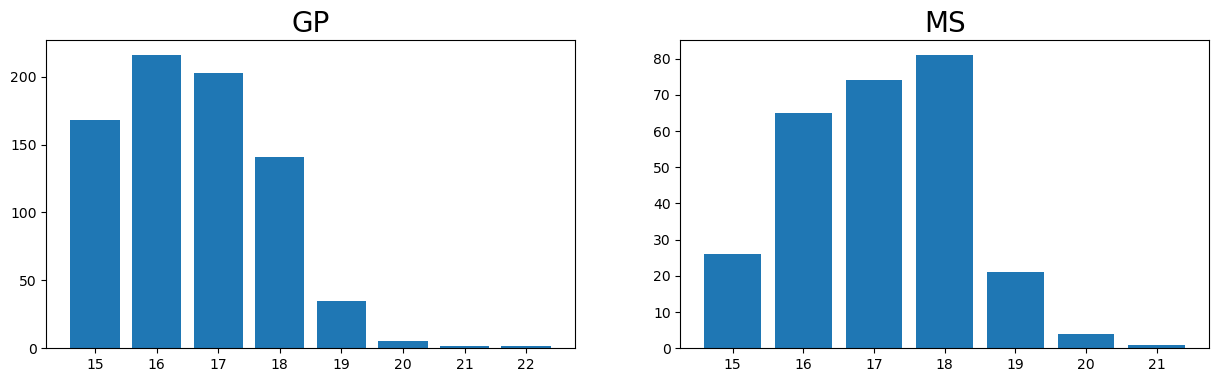

In [124]:
#necesitamos cada colegio ambas materias

# gp_mat
# gp_por
# necesito concatenar los 2 dataframe anteriores

gp=pd.concat([gp_mat,gp_por])
ms=pd.concat([ms_mat,ms_por])

#display(HTML(gp.to_html()))
#print(gp["age"].value_counts()) #separa y cuenta las cosas repetidas

plt.figure(figsize=(15,4))
ax1=plt.subplot(121)
ax2=plt.subplot(122)

ax1.bar(gp["age"].value_counts().index,gp["age"].value_counts().values)
ax2.bar(ms["age"].value_counts().index,ms["age"].value_counts().values)
ax1.set_title("GP",fontsize=20)
ax2.set_title("MS",fontsize=20)

plt.show()

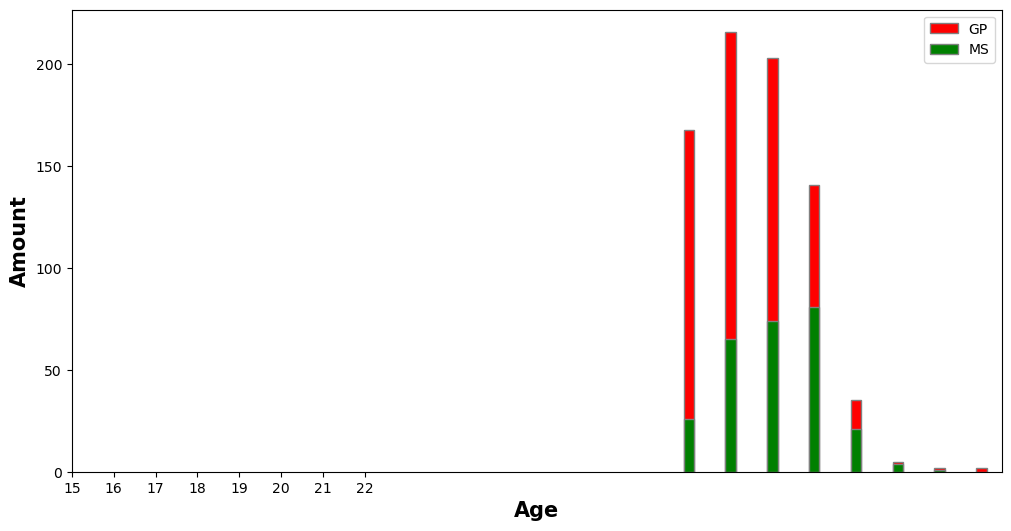

In [135]:
# extra para comparar bonito

plt.figure(figsize=(12,6))
barWidth = 0.25


plt.bar(gp["age"].value_counts().index, gp["age"].value_counts().values, color ='r', width = barWidth,
        edgecolor ='grey', label ='GP')
plt.bar(ms["age"].value_counts().index, ms["age"].value_counts().values, color ='g', width = barWidth,
        edgecolor ='grey', label ='MS')

# Adding Xticks
plt.xlabel('Age', fontweight ='bold', fontsize = 15)
plt.ylabel('Amount', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(gp["age"].value_counts()))],
        ['15', '16', '17', '18', '19',"20","21","22"])


plt.legend()
plt.show()


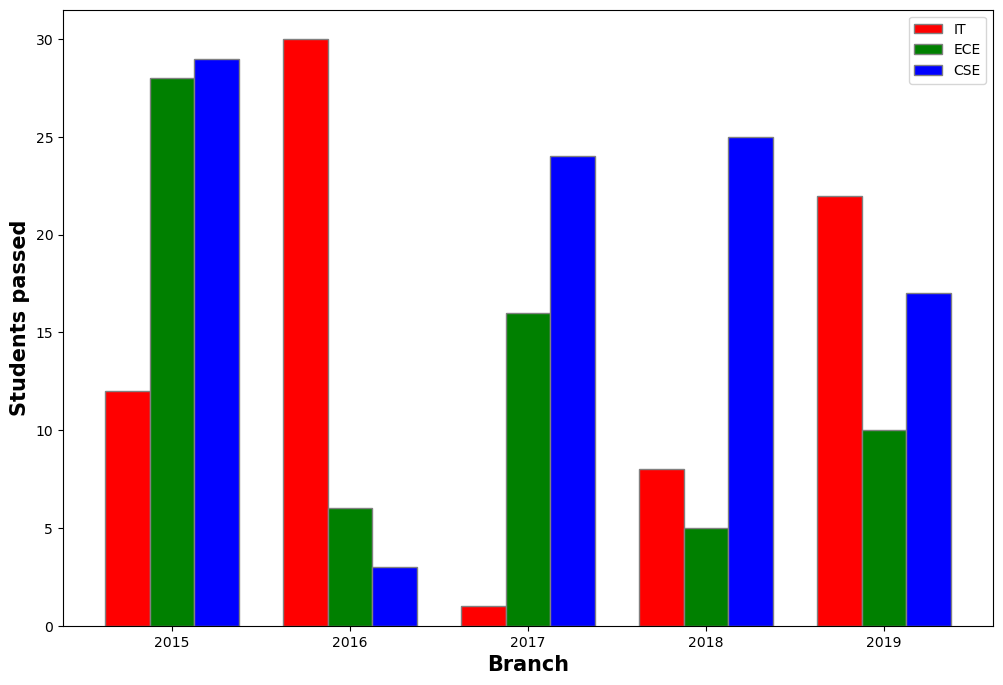

In [123]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
IT = [12, 30, 1, 8, 22]
ECE = [28, 6, 16, 5, 10]
CSE = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='IT')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='ECE')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='CSE')
 
# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['2015', '2016', '2017', '2018', '2019'])
 
plt.legend()
plt.show()